<a href="https://colab.research.google.com/github/mbrudd/csci290/blob/main/notebooks/Age_chronic_conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Age and chronic conditions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chronic = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/chronic.csv")

This dataset is from the 2009 [National Ambulatory Medical Care Survey (NAMCS)](https://health.gov/healthypeople/objectives-and-data/data-sources-and-methods/data-sources/national-ambulatory-medical-care-survey-namcs) -- `Condition` is a binary variable that indicates whether a patient has one of the following chronic conditions: arthritis, asthma, COPD, cancer, depression, diabetes, hyperlipidemia, hypertension, obesity, osteoporosis,
cerebrovascular disease, chronic renal failure, congestive heart failure, or ischemic heart disease. This is quite a list!

In [3]:
chronic

,Age,Condition
0,36,0
1,55,1
2,72,1
3,46,0
4,66,1
...,...,...
31428,49,1
31429,56,1
31430,6,0
31431,1,0


In [5]:
chronic["Condition"].mean()

0.5767823624852861

In [6]:
chronic.groupby("Condition").size()

,0
Condition,
0,13303
1,18130


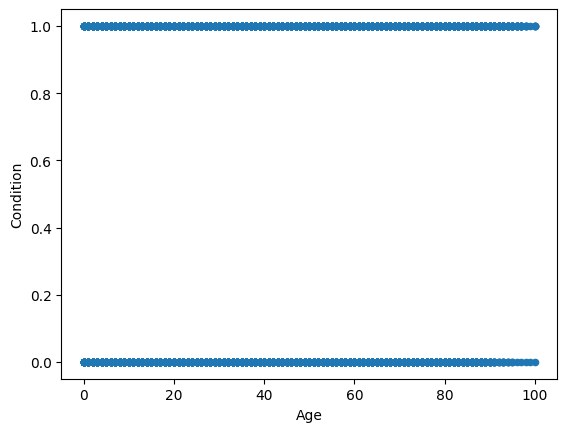

In [4]:
chronic.plot.scatter(x="Age", y="Condition");

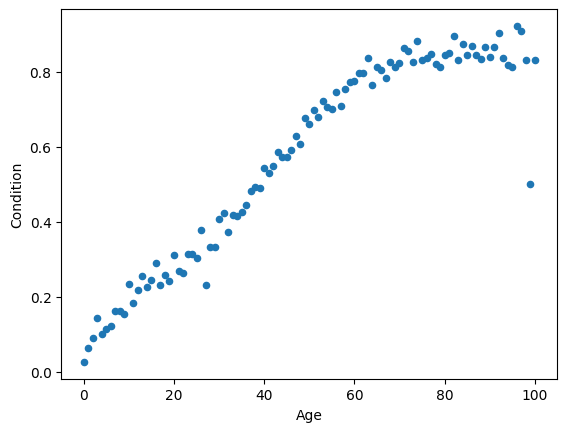

In [7]:
chronic.groupby("Age", as_index=False)["Condition"].mean().plot.scatter(x="Age",y="Condition");

In [8]:
ages = chronic.groupby("Age", as_index=False)["Condition"].mean()
ages

,Age,Condition
0,0,0.026382
1,1,0.063366
2,2,0.090625
3,3,0.143411
4,4,0.100334
...,...,...
96,96,0.923077
97,97,0.909091
98,98,0.833333
99,99,0.500000


In [9]:
chronic["Decade"] = 10*round( chronic["Age"] / 10 )

In [10]:
chronic

,Age,Condition,Decade
0,36,0,40.0
1,55,1,60.0
2,72,1,70.0
3,46,0,50.0
4,66,1,70.0
...,...,...,...
31428,49,1,50.0
31429,56,1,60.0
31430,6,0,10.0
31431,1,0,0.0


In [11]:
decades = chronic.groupby("Decade", as_index=False)["Condition"].mean()
decades

,Decade,Condition
0,0.0,0.073361
1,10.0,0.189106
2,20.0,0.278032
3,30.0,0.370370
4,40.0,0.522463
5,50.0,0.667194
6,60.0,0.770538
7,70.0,0.830043
8,80.0,0.843312
9,90.0,0.855124


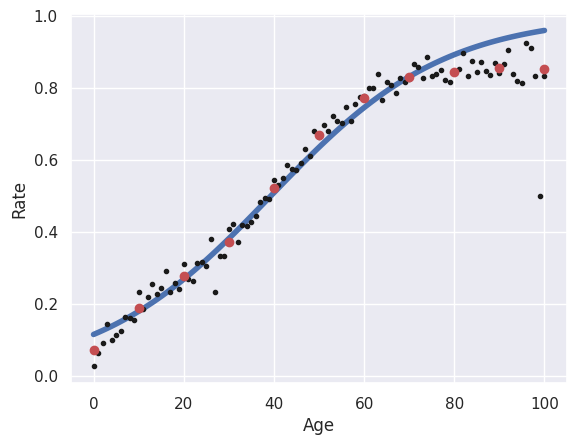

In [12]:
sns.set_theme()
sns.regplot(data=chronic,
             x="Age", y="Condition",
             logistic=True, scatter=False,
             ci=None, line_kws={"lw":"4"})
plt.xlim(-5,105)
plt.ylabel("Rate")
plt.plot( ages["Age"], ages["Condition"],'.k')
plt.plot( decades["Decade"], decades["Condition"],'or',ms=6);

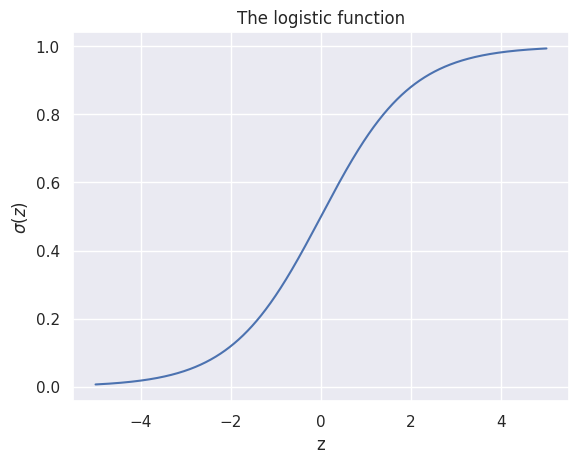

In [13]:
z = np.linspace(-5,5,1000)
sigma = 1 / ( 1 + np.exp(-z))
plt.plot(z, sigma)
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.title("The logistic function");